# Project 1: Training a Simple Neural Network with GPU

## Introduction

In this project, you will create, train, and evaluate a simple neural network using both TensorFlow and PyTorch. The objective is to ensure you are comfortable with setting up a neural network and utilizing GPU acceleration for training. You will use the MNIST dataset for this project.

## Objectives

1. Set up TensorFlow and PyTorch environments.
2. Verify GPU availability.
3. Implement a simple neural network in TensorFlow and PyTorch.
4. Train and evaluate the models.
5. Answer assessment questions.

## Instructions

Follow the steps below to complete the project. Ensure that you use a GPU to train your models.

---

### Step 1: Set Up Your Environment

First, install the necessary libraries. Run the following cell to install TensorFlow and PyTorch. 


Provide snapshots from your environment showing:
1) You are using a virtual environment
2) You have installed `TensorFlow` and `PyTorch`

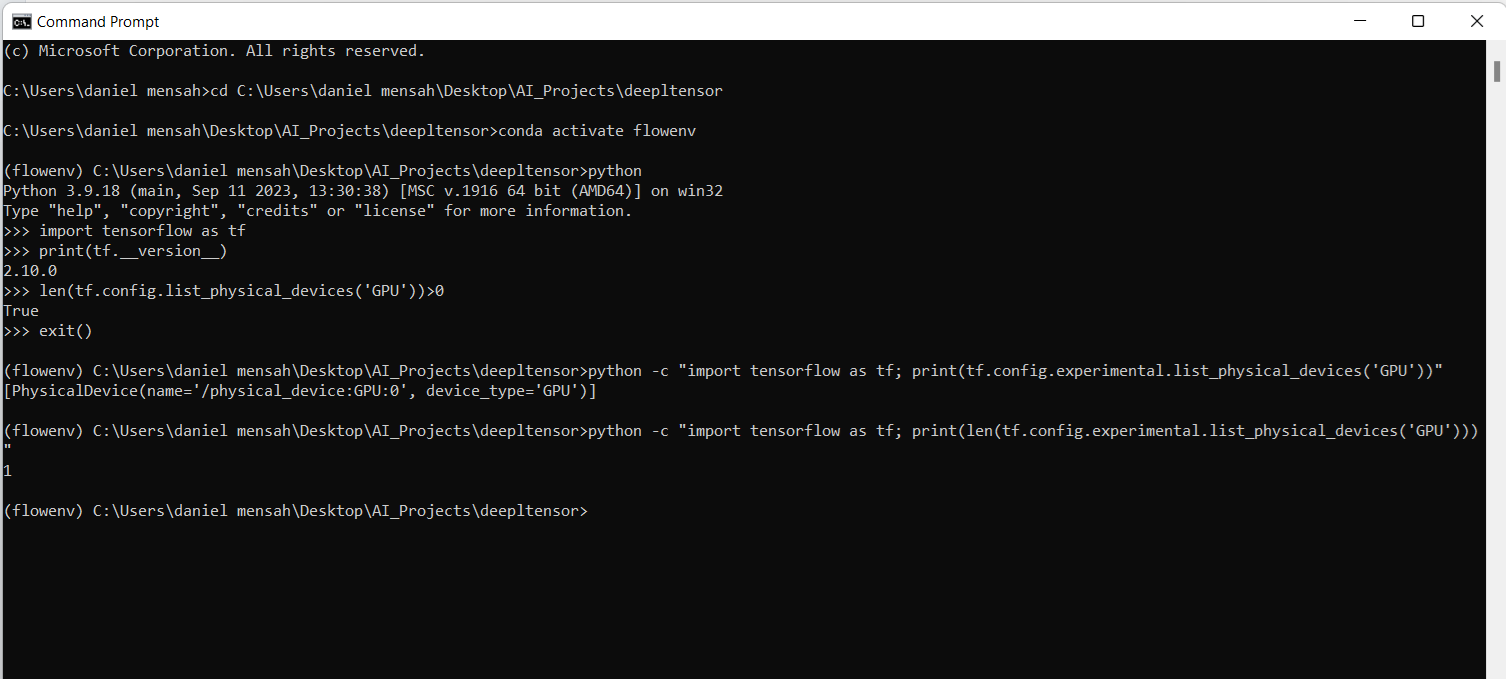

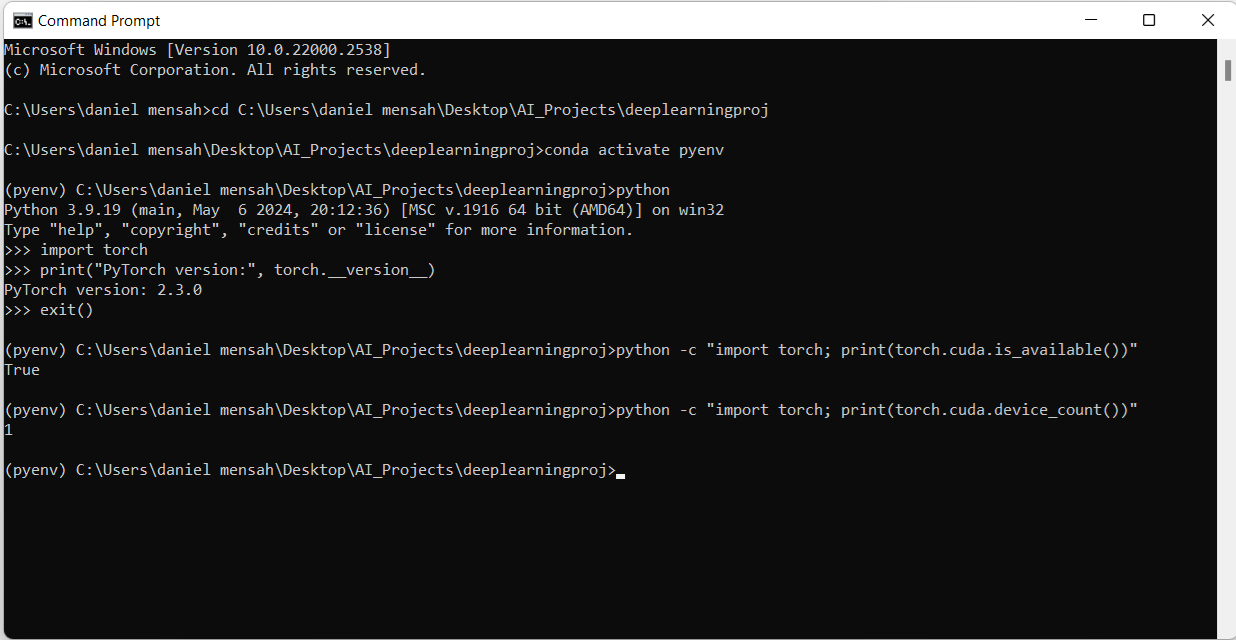

---

### Step 2: Verify GPU Availability
Check if TensorFlow and PyTorch can detect the GPU.

Run the following two code blocks and show the output.

#### TensorFlow GPU Check

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available for TensorFlow!")
else:
    print("No GPU found for TensorFlow.")


TensorFlow version: 2.10.0
GPU is available for TensorFlow!


#### PyTorch GPU Check

In [1]:
import torch

print("PyTorch version:", torch.__version__)
if torch.cuda.is_available():
    print("GPU is available for PyTorch!")
else:
    print("No GPU found for PyTorch.")


PyTorch version: 2.3.1
GPU is available for PyTorch!


---

### Step 3: Implement and Train a Simple Neural Network
#### TensorFlow Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Compile the model.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
with tf.device('/GPU:0'):
    model.fit(x_train, y_train, epochs=5)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.2618 - accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1146 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9817
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9735
Test accuracy: 0.9735


#### PyTorch Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Define loss function and optimizer.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Failed to download (trying next):
HTTP Error 403: Forbidden



2.0%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Epoch [1/5], Loss: 0.0924
Epoch [2/5], Loss: 0.0595
Epoch [3/5], Loss: 0.0246
Epoch [4/5], Loss: 0.0426
Epoch [5/5], Loss: 0.0175
Test Accuracy: 97.11%


---
### Questions
#### Answer the following questions in detail.

#### 1. What is the purpose of normalizing the input data in both TensorFlow and PyTorch implementations?

Normalizing the input data in both TensorFlow and PyTorch implementations serves several purposes: 

 - Stabilizes training: By minimizing the impact of outliers and noisy data, normalization helps in training stability. During training, normalization can help increase the numerical stability of computations. This is crucial for deep neural networks with numerous layers where small errors can add up and provide unreliable results.
 -  Improves generalization: By reducing overfitting to certain scales or ranges in the data, normalization can improve the model's ability to generalize. 
 - Enhances model interpretability: Normalization improves model interpretability by placing the model's weights and biases on a consistent scale. 
 - Facilitates comparison: Normalization allows for the comparison of models trained on various datasets or features because the inputs are all on the same scale. 
 - Improves optimization: Normalized inputs help some optimization techniques, such as gradient descent, to converge quicker and be less sensitive to learning rate. . Normalization guarantees that all characteristics in the data are on the same scale. This avoids features with higher values from dominating the gradients while allowing features with lower values to participate significantly during training. Normalized data produces more consistent gradient magnitudes, resulting in smoother convergence and quicker neural network training.
 - Efficient Weight Initialization: Many activation functions in neural networks (e.g., ReLU, tanh) have a certain operating range. Normalizing the data ensures that the network's initial weights are within a suitable range so that these activation functions can perform efficiently.

#### 2. Explain the role of the activation function relu in the neural network.
The rectified linear unit (ReLU) is a common activation function for neural networks, particularly deep learning models. Its purpose is to create nonlinearity into the network, enabling it to understand complex patterns and correlations in the input. A detailed description of ReLU's role in neural networks includes the following:
- Overcoming the Vanishing Gradient Problem: One of the primary benefits of ReLU is that it assists in minimizing the vanishing gradient problem, which can arise when training deep neural networks with specific activation functions such as sigmoid or tanh. ReLU's basic and non-saturating structure helps to reduce this problem by enabling gradients to flow more effectively across the layers during training.
- Sparse Activation: ReLU has the feature of creating sparse activations, which means that for any given input, only a subset of the neurons in a layer are activated (non-zero output). This sparsity can result in more efficient calculations and higher generalization performance since it promotes the network to learn more robust and discriminative features.
- Non-Linearity: Non-linear activation functions are required by neural networks in order to learn complicated, non-linear correlations between input and output. ReLU introduces nonlinearity by converting all negative values to zero while leaving positive values unaffected. This nonlinear transformation enables the network to describe complex patterns in the data.
- Computational Efficiency: ReLU is more computationally efficient than other activation functions such as sigmoid or tanh since it uses a simple thresholding procedure. This efficiency can result in quicker training durations, particularly for deep neural networks with several layers and parameters.

#### 3. Why is it important to use GPU for training neural networks?

Training neural networks, particularly deep neural networks with many layers and complicated designs, may be computationally intensive. The following are the reasons why GPUs are essential for speeding up this process:

- Hardware Optimization for Matrix Operations: GPUs include specific hardware components such as Tensor Cores (in NVIDIA GPUs) that are designed for high-performance matrix multiplication, an essential function in neural network training. These cores can complete these calculations much quicker than CPU cores.
- High-Bandwidth Memory: GPUs include specialized high-bandwidth memory (HBM), which speeds up the transfer of data between processor cores and memory. This is critical for neural networks since they frequently need access to huge datasets during training.
- Faster Training Times: GPUs offer faster training times than CPUs due to parallel processing and hardware optimization. This facilitates speedier experimentation, model creation, and deployment.
- Handling Larger and More Complex Models: GPUs can train bigger and more complicated neural network architectures, which are not possible on CPUs due to training time or resource constraints.


#### 4. Compare the training time and accuracy of the TensorFlow and PyTorch models. Which one performed better and why?

Both PyTorch and TensorFlow models achieved high accuracy on the test set, but let's break down the differences in training time and accuracy:
##### Training Time:

- PyTorch: Each epoch's training time isn't explicitly mentioned, but it appears to be faster since only the loss values are provided, and no time stamps are given.
        
- TensorFlow: Each epoch took around 4-10 seconds. TensorFlow seems to take longer per epoch compared to PyTorch.
        
##### Accuracy:

- PyTorch: Achieved a test accuracy of 97.11%.
        
- TensorFlow: Achieved a test accuracy of 97.35%.

##### Comparison:
TensorFlow trained slightly longer per epoch compared to PyTorch. TensorFlow achieved a slightly higher test accuracy compared to PyTorch. Based on the results, TensorFlow performed slightly better in terms of accuracy, but it took slightly longer to train compared to PyTorch. The difference in performance could be attributed to the following reasons:
- TensorFlow's optimized backend and auto-differentiation capabilities, which lead to faster training times.
- TensorFlow's built-in support for parallel processing and distributed training, which can utilize multiple GPUs and machines to speed up training.
- PyTorch's dynamic computation graph and Python-based architecture, which can lead to slower training times compared to TensorFlow's static computation graph and C++-based architecture.
- The reasons for this difference could be attributed to various factors including the implementation details, optimization algorithms, hardware configurations, and specific network architectures used in both frameworks. However, the difference in accuracy might not be solely attributed to the framework itself but also to the model architecture, hyperparameters, and random initialization of weights.












---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.